In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
#파일 읽어 오기
city =pd.read_csv('도시수질19~22(전처리).csv',index_col=0)

In [3]:
city[:3]

,항목,2019.01,2019.02,2019.03,2019.04,2019.05,2019.06,2019.07,2019.08,2019.09,...,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10
수계별,,,,,,,,,,,,,,,,,,,,,
공촌천,수소이온농도,8.9,8.5,8.7,8.0,8.5,8.3,7.7,8.5,7.7,...,7.9,7.9,7.9,8.1,8.3,8.4,7.9,8.5,8.5,8.5
공촌천,수온,2.1,11.2,17.1,10.0,24.3,27.7,24.8,32.8,28.3,...,12.3,6.8,17.3,17.3,25.3,29.1,25.4,29.1,23.4,22.5
공촌천,용존산소,13.1,7.9,10.9,11.8,10.2,8.7,8.0,9.6,8.4,...,11.2,13.1,10.7,11.3,9.2,8.6,8.7,10.5,9.7,9.9


In [4]:
city.columns

Index(['항목', '2019.01', '2019.02', '2019.03', '2019.04', '2019.05', '2019.06',
       '2019.07', '2019.08', '2019.09', '2019.10', '2019.11', '2019.12',
       '2020.01', '2020.02', '2020.03', '2020.04', '2020.05', '2020.06',
       '2020.07', '2020.08', '2020.09', '2020.10', '2020.11', '2020.12',
       '2021.01', '2021.02', '2021.03', '2021.04', '2021.05', '2021.06',
       '2021.07', '2021.08', '2021.09', '2021.10', '2021.11', '2021.12',
       '2022.01', '2022.02', '2022.03', '2022.04', '2022.05', '2022.06',
       '2022.07', '2022.08', '2022.09', '2022.10'],
      dtype='object')

# 가설: 동계와 하계에 따라 수질 데이터가 변화한다.

In [5]:
winter_columns = [col for col in city.columns if col.endswith(('.01', '.02', '.12'))]


['2019.01',
 '2019.02',
 '2019.12',
 '2020.01',
 '2020.02',
 '2020.12',
 '2021.01',
 '2021.02',
 '2021.12',
 '2022.01',
 '2022.02']

In [7]:
summer_columns = [col for col in city.columns if col.endswith(('.06', '.07', '.08'))]


['2019.06',
 '2019.07',
 '2019.08',
 '2020.06',
 '2020.07',
 '2020.08',
 '2021.06',
 '2021.07',
 '2021.08',
 '2022.06',
 '2022.07',
 '2022.08']

In [8]:
c_w=city[['항목'] + winter_columns]
c_s=city[['항목'] + summer_columns]

In [9]:
path=city[city['항목'].isin(['수소이온농도','용존산소'])]

In [10]:
path_winter = path[['항목'] + winter_columns]
path_summer = path[['항목'] + summer_columns]

In [11]:
path_winter

,항목,2019.01,2019.02,2019.12,2020.01,2020.02,2020.12,2021.01,2021.02,2021.12,2022.01,2022.02
수계별,,,,,,,,,,,,
공촌천,수소이온농도,8.9,8.5,7.8,8.0,8.3,7.7,7.3,7.5,7.8,7.9,7.9
공촌천,용존산소,13.1,7.9,13.0,13.5,12.8,10.6,12.3,11.8,12.5,11.2,13.1
남천,수소이온농도,7.1,7.3,7.0,7.6,7.4,6.8,6.5,6.6,7.0,7.3,6.4
남천,용존산소,13.6,10.5,10.4,11.8,9.0,11.2,12.4,13.1,10.7,12.6,12.3
무거천,수소이온농도,7.0,8.7,7.7,8.2,7.9,8.0,7.4,7.5,6.5,7.4,7.8
무거천,용존산소,15.0,15.3,13.8,15.6,14.6,11.9,12.9,11.4,12.1,12.6,11.8
수영강,수소이온농도,8.0,8.1,7.7,7.8,7.5,6.9,8.1,8.0,6.9,7.2,8.7
수영강,용존산소,14.1,14.4,9.9,11.6,13.2,11.3,14.7,14.7,10.2,12.6,15.6
유등천,수소이온농도,8.2,8.1,8.1,8.1,8.1,7.1,7.6,7.8,7.4,7.4,7.5


In [12]:
path_summer

,항목,2019.06,2019.07,2019.08,2020.06,2020.07,2020.08,2021.06,2021.07,2021.08,2022.06,2022.07,2022.08
수계별,,,,,,,,,,,,,
공촌천,수소이온농도,8.3,7.7,8.5,8.3,7.6,-,8.7,7.7,7.6,8.4,7.9,8.5
공촌천,용존산소,8.7,8.0,9.6,9.0,7.6,-,9.1,13.4,10.8,8.6,8.7,10.5
남천,수소이온농도,7.3,7.9,6.7,7.3,7.4,7.2,7.4,6.7,7.5,7.2,7.4,7.1
남천,용존산소,8.8,8.6,7.6,7.4,8.2,8.2,8.1,7.9,6.8,5.4,7.2,6.1
무거천,수소이온농도,8.5,8.1,7.4,8.2,7.8,9.1,8.1,7.8,7.5,7.8,9.5,8.0
무거천,용존산소,14.1,9.1,10.2,11.9,8.9,12.3,11.9,7.7,8.2,9.7,8.5,10.7
수영강,수소이온농도,8.3,8.3,8.2,6.9,6.7,7.5,8.8,7.5,7.7,8.8,8.6,8.1
수영강,용존산소,7.8,8.2,6.2,7.8,7.4,8.0,8.4,7.4,6.9,9.1,8.2,8.0
유등천,수소이온농도,7.4,8.2,7.6,7.5,7.9,7.6,7.4,7.7,7.3,7.6,7.8,7.9


In [1]:
plt.rcParams['font.family'] = 'D2coding'
plt.rcParams['axes.unicode_minus'] = False

winter_data = path_winter.mean(numeric_only=True)
summer_data = path_summer.mean(numeric_only=True)

plt.figure(figsize=(10, 6))

x = np.arange(len(winter_data.index))
width = 0.35

plt.bar(x, winter_data, width, label='동계(수질)')
plt.bar(x + width, summer_data, width, label='하계(수질)')

# 동계와 하계 컬럼 이름을 합쳐서 x축 레이블로 설정
x_labels = [f'{winter_col} / {summer_col}' for winter_col, summer_col in zip(winter_data.index, summer_data.index)]

plt.xlabel('날짜 (동계 / 하계)')
plt.ylabel('평균')
plt.title('동계와 하계 수질 데이터 비교')
plt.legend(loc=(1,0.1))
plt.xticks(x + width / 2, x_labels, rotation=45)
plt.show()


NameError: name 'plt' is not defined

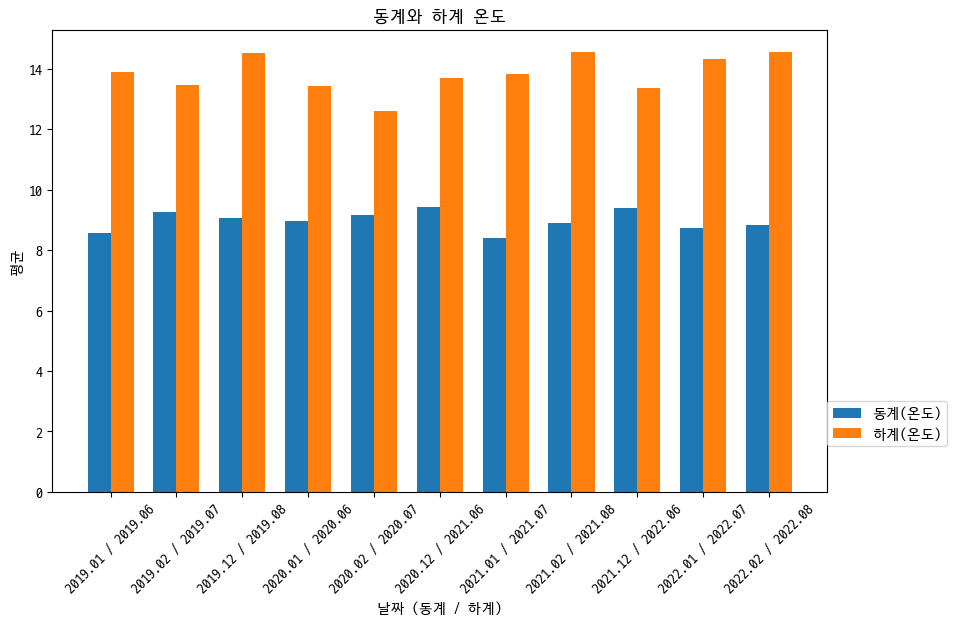

In [27]:
winter_data = c_w.mean(numeric_only=True)
summer_data = c_s.mean(numeric_only=True)

plt.figure(figsize=(10, 6))

x = np.arange(len(winter_data.index))
width = 0.35

plt.bar(x, winter_data, width, label='동계(온도)')
plt.bar(x + width, summer_data, width, label='하계(온도)')

# 동계와 하계 컬럼 이름을 합쳐서 x축 레이블로 설정
x_labels = [f'{winter_col} / {summer_col}' for winter_col, summer_col in zip(winter_data.index, summer_data.index)]

plt.xlabel('날짜 (동계 / 하계)')
plt.ylabel('평균')
plt.title('동계와 하계 온도')
plt.legend(loc=(1,0.1))
plt.xticks(x + width / 2, x_labels, rotation=45)  # x 축 레이블 설정 및 회전
plt.show()